# Booking Hotel Analysis

Dataset yang digunakan adalah dataset yang diambil dari sumber [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand). Dataset ini berisi data dari **dua hotel yang berbeda**. Satu **Resort Hotel** dan satu **City Hotel**.
Kedua hotel ini diketahui terletak di **Portugal** (Eropa bagian selatan), Resort Hotel di wilayah **Algarve Resort** dan City Hotel di **Kota Lisbon**. Namun, pada analisis kali ini saya **hanya** menganalisis data **City Hotel di Kota Lisbon**.
Data ini mencakup *booking* untuk kedatangan antara **1 Juli 2015 hingga 31 Agustus 2017**.

## Import Library

In [140]:
# import library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
sns.set_style('white')

In [141]:
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [142]:
# memanggil data

df = pd.read_csv('hotel_bookings.csv')

In [143]:
# membaca data

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [144]:
# Memfilter hanya City Hotel yang akan dilakukan analisis
df = df[df['hotel']=='City Hotel']
df.drop('hotel', axis=1, inplace=True)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79330 entries, 40060 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     79330 non-null  int64  
 1   lead_time                       79330 non-null  int64  
 2   arrival_date_year               79330 non-null  int64  
 3   arrival_date_month              79330 non-null  object 
 4   arrival_date_week_number        79330 non-null  int64  
 5   arrival_date_day_of_month       79330 non-null  int64  
 6   stays_in_weekend_nights         79330 non-null  int64  
 7   stays_in_week_nights            79330 non-null  int64  
 8   adults                          79330 non-null  int64  
 9   children                        79326 non-null  float64
 10  babies                          79330 non-null  int64  
 11  meal                            79330 non-null  object 
 12  country                         

In [146]:
# statistics descriptive for numerical data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,79330.0,0.417270,0.493111,0.0,0.0,0.0,1.0,1.0
lead_time,79330.0,109.735724,110.948526,0.0,23.0,74.0,163.0,629.0
arrival_date_year,79330.0,2016.174285,0.699181,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,79330.0,27.177449,13.398523,1.0,17.0,27.0,38.0,53.0
arrival_date_day_of_month,79330.0,15.786625,8.728451,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,79330.0,0.795185,0.885026,0.0,0.0,1.0,2.0,16.0
stays_in_week_nights,79330.0,2.182957,1.456416,0.0,1.0,2.0,3.0,41.0
adults,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
children,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
babies,79330.0,0.004941,0.084323,0.0,0.0,0.0,0.0,10.0


In [147]:
# statistics descriptive for the categorical data

df.describe(include='O').T

,count,unique,top,freq
arrival_date_month,79330,12,August,8983
meal,79330,4,BB,62305
country,79306,166,PRT,30960
market_segment,79330,8,Online TA,38748
distribution_channel,79330,5,TA/TO,68945
reserved_room_type,79330,8,A,62595
assigned_room_type,79330,9,A,57007
deposit_type,79330,3,No Deposit,66442
customer_type,79330,4,Transient,59404
reservation_status,79330,3,Check-Out,46228


## Data Cleansing

In [148]:
# check missing value
missing_list = df.isnull().sum()
df_na = pd.DataFrame(missing_list).rename(columns={'index': 'Column', 0: 'Number_missing_value'})
print('Number of missing value for each column :')
df_na

Number of missing value for each column :


,Number_missing_value
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,4


In [149]:
# mengisi missing value pada kolom children dengan 0 sesuai dengan modusnya
# mengisi missing value pada kolom negara dengan 'Unknown'
nan_replacements = {"children": 0.0,"country": "Unknown"}
df_clean = df.fillna(nan_replacements)

# Beberapa data terdiri dari 0 adults, 0 children, dan 0 babies 
# Saya akan menghapus data yang tidak ada jumlah tamu
zero_guests = (df_clean['adults']==0) & (df_clean['children']==0) & (df_clean['babies']==0)
df_clean = df_clean[~zero_guests]

# Menghapus kolom yang tidak dibutuhkan dan memiliki missing value
df_clean = df_clean.drop(['agent', 'company', 'reservation_status'], axis=1)

In [150]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79163 entries, 40060 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     79163 non-null  int64  
 1   lead_time                       79163 non-null  int64  
 2   arrival_date_year               79163 non-null  int64  
 3   arrival_date_month              79163 non-null  object 
 4   arrival_date_week_number        79163 non-null  int64  
 5   arrival_date_day_of_month       79163 non-null  int64  
 6   stays_in_weekend_nights         79163 non-null  int64  
 7   stays_in_week_nights            79163 non-null  int64  
 8   adults                          79163 non-null  int64  
 9   children                        79163 non-null  float64
 10  babies                          79163 non-null  int64  
 11  meal                            79163 non-null  object 
 12  country                         

In [151]:
# mengubah tipe data
df_clean['children'] = df_clean['children'].astype(int)
df_clean['reservation_status_date'] = pd.to_datetime(df_clean['reservation_status_date'])

In [152]:
print('Number missing value after data cleansing :')
print(df_clean.isnull().sum())

Number missing value after data cleansing :
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_req

In [153]:
# buat kolom baru total night
df_clean['total_night'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']
# Buat kolom 'total_revenue'
df_clean['total_revenue'] = df_clean.apply(
    lambda row: row['total_night'] * row['adr'] 
    if row['is_canceled'] == 0 or row['deposit_type'] == 'Non Refund' 
    else 0,
    axis=1
)
# Buat kolom 'lost_revenue' dengan kondisi kebalikan dari 'total_revenue'
df_clean['lost_revenue'] = df_clean.apply(
    lambda row: row['total_night'] * row['adr'] 
    if row['is_canceled'] == 1 and row['deposit_type'] != 'Non Refund' 
    else 0,
    axis=1
)

# Buat kolom baru 'guest' berdasarkan nilai 'country'
df_clean['guest_origin'] = df_clean['country'].apply(lambda x: 'domestic' if x == 'PRT' else 'international')

# Buat kolom baru 'total_guest'
df_clean['total_guest'] = df_clean['adults']+df_clean['children']+df_clean['babies']

df_clean.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_night,total_revenue,lost_revenue,guest_origin,total_guest
40060,0,6,2015,July,27,1,0,2,1,0,...,Transient,0.0,0,0,2015-07-03,2,0.0,0.0,domestic,1
40061,1,88,2015,July,27,1,0,4,2,0,...,Transient,76.5,0,1,2015-07-01,4,0.0,306.0,domestic,2
40062,1,65,2015,July,27,1,0,4,1,0,...,Transient,68.0,0,1,2015-04-30,4,0.0,272.0,domestic,1
40063,1,92,2015,July,27,1,2,4,2,0,...,Transient,76.5,0,2,2015-06-23,6,0.0,459.0,domestic,2
40064,1,100,2015,July,27,2,0,2,2,0,...,Transient,76.5,0,1,2015-04-02,2,0.0,153.0,domestic,2


In [154]:
# Dictionary untuk konversi nama bulan ke angka bulan
month_dict = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Konversi nama bulan menjadi angka bulan
df_clean['arrival_date_month'] = df_clean['arrival_date_month'].map(month_dict)
df_clean.head()

# Fungsi untuk menggabungkan tahun, bulan, dan tanggal menjadi satu kolom datetime
def create_datetime(row):
    return pd.Timestamp(year=row['arrival_date_year'], month=row['arrival_date_month'], day=row['arrival_date_day_of_month'])

# Terapkan fungsi ke setiap baris menggunakan apply
df_clean['arrival_date'] = df_clean.apply(create_datetime, axis=1)
df_clean = df_clean.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number'], axis=1)

# buat data bulan
df_clean['arrival_month'] = df_clean['arrival_date'].dt.to_period('M').astype(str)

# Langkah 2: Ekstrak bulan dan tahun dari 'arrival_month'
df_clean['month'] = df_clean['arrival_date'].dt.month
df_clean['year'] = df_clean['arrival_date'].dt.year

# Langkah 3: Membuat kolom semester berdasarkan bulan dan tahun
df_clean['semester'] = df_clean.apply(
    lambda x: f"Semester 1 {x['year']}" if x['month'] <= 6 else f"Semester 2 {x['year']}",
    axis=1
)

# Cetak data setelah perubahan
df_clean.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,...,total_night,total_revenue,lost_revenue,guest_origin,total_guest,arrival_date,arrival_month,month,year,semester
40060,0,6,0,2,1,0,0,HB,PRT,Offline TA/TO,...,2,0.0,0.0,domestic,1,2015-07-01,2015-07,7,2015,Semester 2 2015
40061,1,88,0,4,2,0,0,BB,PRT,Online TA,...,4,0.0,306.0,domestic,2,2015-07-01,2015-07,7,2015,Semester 2 2015
40062,1,65,0,4,1,0,0,BB,PRT,Online TA,...,4,0.0,272.0,domestic,1,2015-07-01,2015-07,7,2015,Semester 2 2015
40063,1,92,2,4,2,0,0,BB,PRT,Online TA,...,6,0.0,459.0,domestic,2,2015-07-01,2015-07,7,2015,Semester 2 2015
40064,1,100,0,2,2,0,0,BB,PRT,Online TA,...,2,0.0,153.0,domestic,2,2015-07-02,2015-07,7,2015,Semester 2 2015


In [155]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79163 entries, 40060 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   is_canceled                     79163 non-null  int64         
 1   lead_time                       79163 non-null  int64         
 2   stays_in_weekend_nights         79163 non-null  int64         
 3   stays_in_week_nights            79163 non-null  int64         
 4   adults                          79163 non-null  int64         
 5   children                        79163 non-null  int32         
 6   babies                          79163 non-null  int64         
 7   meal                            79163 non-null  object        
 8   country                         79163 non-null  object        
 9   market_segment                  79163 non-null  object        
 10  distribution_channel            79163 non-null  object        
 11  is

In [156]:
df_confirm = df_clean[df_clean['is_canceled']==0].drop('is_canceled', axis=1)
df_cancel = df_clean[df_clean['is_canceled']==1].drop('is_canceled', axis=1)

In [157]:
df_confirm.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,total_night,total_revenue,lost_revenue,guest_origin,total_guest,arrival_date,arrival_month,month,year,semester
40060,6,0,2,1,0,0,HB,PRT,Offline TA/TO,TA/TO,...,2,0.00,0.0,domestic,1,2015-07-01,2015-07,7,2015,Semester 2 2015
40066,3,0,3,1,0,0,HB,PRT,Groups,TA/TO,...,3,176.01,0.0,domestic,1,2015-07-02,2015-07,7,2015,Semester 2 2015
40070,43,0,2,2,0,0,HB,PRT,Groups,TA/TO,...,2,172.00,0.0,domestic,2,2015-07-03,2015-07,7,2015,Semester 2 2015
40071,43,0,2,2,0,0,HB,PRT,Groups,TA/TO,...,2,86.00,0.0,domestic,2,2015-07-03,2015-07,7,2015,Semester 2 2015
40072,43,0,2,2,0,0,HB,PRT,Groups,TA/TO,...,2,172.00,0.0,domestic,2,2015-07-03,2015-07,7,2015,Semester 2 2015


## Exploratory Data Analysis

### Over View

In [158]:
booking = df_clean.shape[0]
adults = df_clean['adults'].sum()
children = df_clean['children'].sum()
babies = df_clean['babies'].sum()
guest = adults+children+babies
total_country =df_clean['country'].nunique()
revenue = "€{:,.2f}".format(df_clean['total_revenue'].sum())
Los = round(df_clean['total_night'].mean(),2)
adr = df_clean['adr'].mean()

print(f'Total booking hotel : {booking}\n')
print(f'Total tamu : {guest}')
print(f'Total tamu dewasa : {adults}')
print(f'Total tamu anak-anak : {children}')
print(f'Total tamu bayi : {babies}\n')
print(f'Total asal negara : {total_country}\n')
print(f'Total pendapatan : {revenue}\n')
print(f'Rata-rata harga permalam : {adr}\n')
print(f'Rata-rata tamu menginap: {Los} malam')

Total booking hotel : 79163

Total tamu : 154478
Total tamu dewasa : 146838
Total tamu anak-anak : 7248
Total tamu bayi : 392

Total asal negara : 167

Total pendapatan : €17,551,614.84

Rata-rata harga permalam : 105.50319050566553

Rata-rata tamu menginap: 2.97 malam


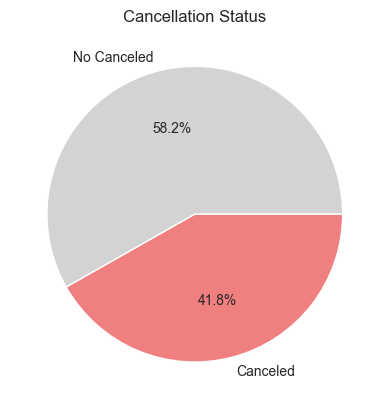

In [159]:
df_clean.groupby('is_canceled').size().plot(kind='pie', autopct='%.1f%%', labels=['No Canceled', 'Canceled'], colors=['lightgrey','lightcoral'])
plt.title('Cancellation Status')
plt.show();

**Tingkat pembatalan** pesanan cukup tinggi yaitu **mencapai 41%**. Lalu apakah ini sesuatu yang baik? Bagaimana **tren tingkat pembatalan** dalam 2 tahun terakhir? 

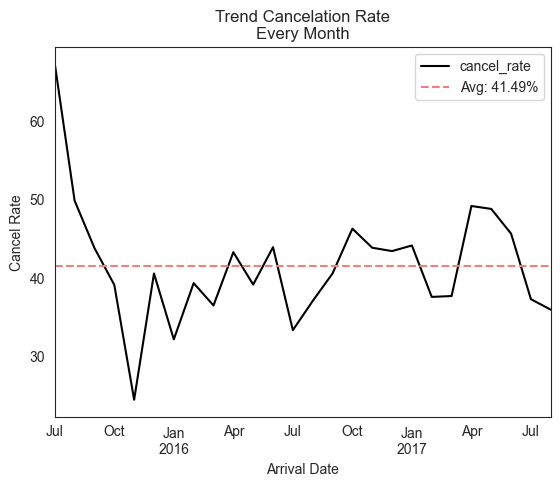

In [160]:
# Groupby per bulan
df_monthly = df_clean.groupby(pd.Grouper(key='arrival_date', freq='M')).size().reset_index().rename(columns={0: 'count'})
df_monthly_guest = df_confirm.groupby(pd.Grouper(key='arrival_date', freq='M')).size().reset_index().rename(columns={0: 'no_cancel'})
df_monthly_cncl = df_cancel.groupby(pd.Grouper(key='arrival_date', freq='M')).size().reset_index().rename(columns={0: 'cancel'})
df_monthly_gabung = pd.merge(df_monthly_guest, df_monthly_cncl, on='arrival_date', how='inner')

# Tampilkan hasil
df_monthly_gabung['cancel_rate'] = df_monthly_gabung['cancel']/(df_monthly_gabung['cancel']+df_monthly_gabung['no_cancel'])*100
df_monthly_gabung.plot(kind='line', x='arrival_date', y='cancel_rate', color='black')

month_cncl_rate = df_monthly_gabung['cancel_rate'].mean()
plt.axhline(month_cncl_rate, color='lightcoral', linestyle='--', label=f'Avg: {month_cncl_rate:.2f}%')

# Menampilkan label dan legenda
plt.xlabel('Arrival Date')
plt.ylabel('Cancel Rate')
plt.legend()
plt.title('Trend Cancelation Rate\nEvery Month');

Tingkat pembatalan pesanan sepanjang waktu terjadi **trend kenaikan**, dengan **rata-rata tingkat pembatalan** mencapai **41% tiap bulannya.**

In [161]:
revenue = round(df_clean['total_revenue'].sum(),2)
lost_revenue = round(df_clean['lost_revenue'].sum(),2)
pct_lost_revenue = round(lost_revenue/(lost_revenue+revenue)*100,2)
print(f'Total Revenue : {revenue}')
print(f'Lost Revenue : {lost_revenue}')
print(f'Lost Revenue Persentage : {pct_lost_revenue} %')

Total Revenue : 17551614.84
Lost Revenue : 7718786.94
Lost Revenue Persentage : 30.54 %


Adanya pembatalan tersebut berdampak pada **kehilangan 30.54% total revenue** atau sekitar **7.7 juta euro** dalam 2 tahun terakhir!

In [162]:
country_visitors = df_confirm.groupby(['country']).size().reset_index(name = 'count')


import plotly.express as px

px.choropleth(country_visitors,
                    locations = "country",
                    color= "count" ,
                    hover_name= "country", 
                    color_continuous_scale = px.colors.sequential.Reds,
                    projection = 'orthographic',
                    title="Nationality of visitors"
             )

Asal tamu yang menginap di hotel berasal dari negara-negara di **penjuru dunia**. Kebanyakan tamu yang berkunjung adalah berasal dari **Portugal**(dalam negeri), dan negara-negara di sekitar **Eropa** dimana **Prancis** menjadi yang terbesar. Sedangkan **USA dan Brazil** adalah asal negara tamu terbesar di **luar benua Eropa**.

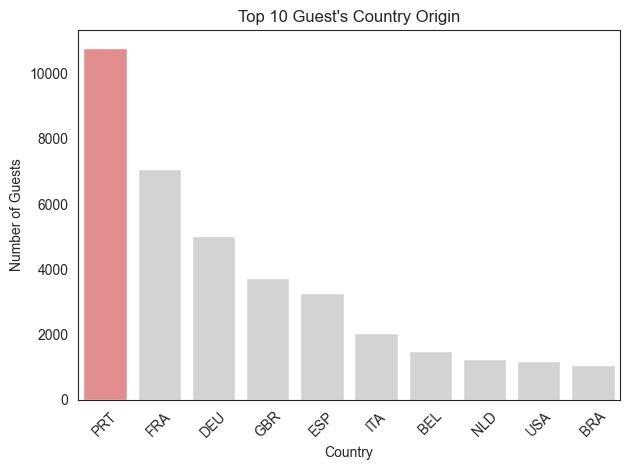

In [163]:
top_countries = df_confirm['country'].value_counts().head(10)

# Plot bar dengan Seaborn
sns.barplot(x=top_countries.index, y=top_countries.values, palette=['lightcoral' if c == top_countries.idxmax() else 'lightgrey' for c in top_countries.index])

# Atur judul dan label sumbu
plt.title("Top 10 Guest's Country Origin")
plt.xlabel('Country')
plt.ylabel('Number of Guests')

# Tampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Portugal** menjadi negara asal tamu **terbesar**, diikuti dengan **Prancis, Jerman,Inggris** serta beberapa negara lain yang **sebagian besar** berasal dari benua **Eropa**, termasuk **Brazil** dan **USA** yang menjadi negara di luar Eropa di **10 besar**.

In [164]:
df_clean.groupby('guest_origin')['is_canceled'].mean()

guest_origin
domestic         0.650271
international    0.269368
Name: is_canceled, dtype: float64

Tingkat pembatalan domestik mencapai 65%, sedangkan internasional hanya 27%.

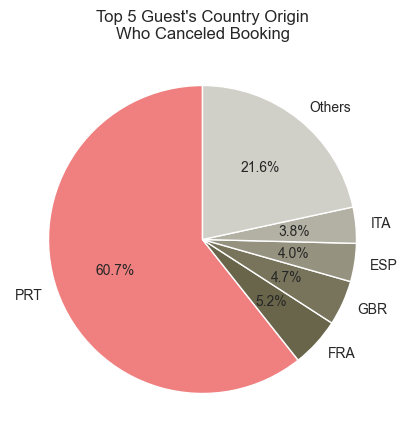

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Hitung jumlah pembatalan untuk setiap negara
cancel_counts = df_cancel['country'].value_counts()

# Ambil 5 negara teratas
top_countries = cancel_counts.head(5)

# Hitung jumlah pembatalan untuk negara lainnya
other_count = cancel_counts.sum() - top_countries.sum()

# Jika ada negara lain selain 5 teratas, tambahkan ke dalam kategori "Others"
if other_count > 0:
    top_countries['Others'] = other_count

# Warna sorotan untuk persentase terbesar (light coral)
highlight_color = 'lightcoral'

grey_colors = [
    mcolors.to_rgba('#69654A', alpha=1.0),  # Light Coral dengan alpha 0.2
    mcolors.to_rgba('#69654A', alpha=0.9),  # Light Coral dengan alpha 0.4
    mcolors.to_rgba('#69654A', alpha=0.7),  # Light Coral dengan alpha 0.6
    mcolors.to_rgba('#69654A', alpha=0.5),  # Light Coral dengan alpha 0.8
    mcolors.to_rgba('#69654A', alpha=0.3)   # Light Coral dengan alpha 1.0
]

# Plot pie chart dengan warna sorotan dan skala warna abu-abu
colors = [highlight_color] + grey_colors[:(len(top_countries) - 1)] + ['#CCCCCC']
# Plot pie chart
plt.figure(figsize=(5, 5))
top_countries.plot(kind='pie', autopct='%.1f%%', label='', startangle=90, colors=colors)
plt.title("Top 5 Guest's Country Origin\nWho Canceled Booking")
plt.ylabel('')
plt.show()

**Portugal** menjadi negara asal tamu yang sering melakukan pembatalan, dengan **60.7%** dari keseluruhan pembatalan.

In [166]:
total = df_clean.groupby('country').size().reset_index(name='total').sort_values(by='total', ascending=False)
cncl = df_cancel.groupby('country').size().reset_index(name='cancel').sort_values(by='cancel', ascending=False)
result = pd.merge(total, cncl, on='country')
result['cancel_rate'] = round((result['cancel']/result['total'])*100,2)

In [167]:
avg_cncl_rate = (result['cancel'].sum()/result['total'].sum())*100
print(f"Tingkat pembatalan secara keseluruhan adalah {round(avg_cncl_rate, 2)}%")

Tingkat pembatalan secara keseluruhan adalah 41.84%


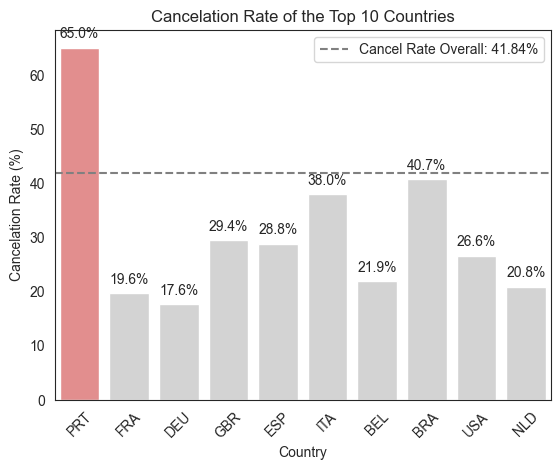

In [168]:
# Plot barplot dengan warna berdasarkan perbandingan dengan rata-rata
colors = ['lightcoral' if rate > avg_cncl_rate else 'lightgray' for rate in result['cancel_rate']]
ax = sns.barplot(data=result.head(10), x='country', y='cancel_rate', palette=colors)

# Garis rata-rata
plt.axhline(avg_cncl_rate, color='gray', linestyle='--', label=f'Cancel Rate Overall: {avg_cncl_rate:.2f}%')

# Annotate nilai persentase di setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Label, judul, dan legenda
plt.xlabel('Country')
plt.ylabel('Cancelation Rate (%)')
plt.title('Cancelation Rate of the Top 10 Countries')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Walaupun **Portugal** menjadi penyumbang tamu terbesar, namun tingkat pembatalanya pun sangat tinggi hingga mencapai **65%**.

### Data Distribution Overall

Supaya kita dapat lebih jelas dan lebih cepat memahami datanya seperti apa, kita dapat membuat visualisasi data untuk seluruh variabel sekaligus

In [169]:
# membuat data khusus numerikal
num_var = df_confirm.select_dtypes(exclude='O')

# membuat data khusus kategorikal
cat_var = df_confirm.select_dtypes(include='O')

#### Numerical Data Distribution

In [170]:
# membuat fungsi untuk menampilkan visualisasi sesuai jumlah kolom
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

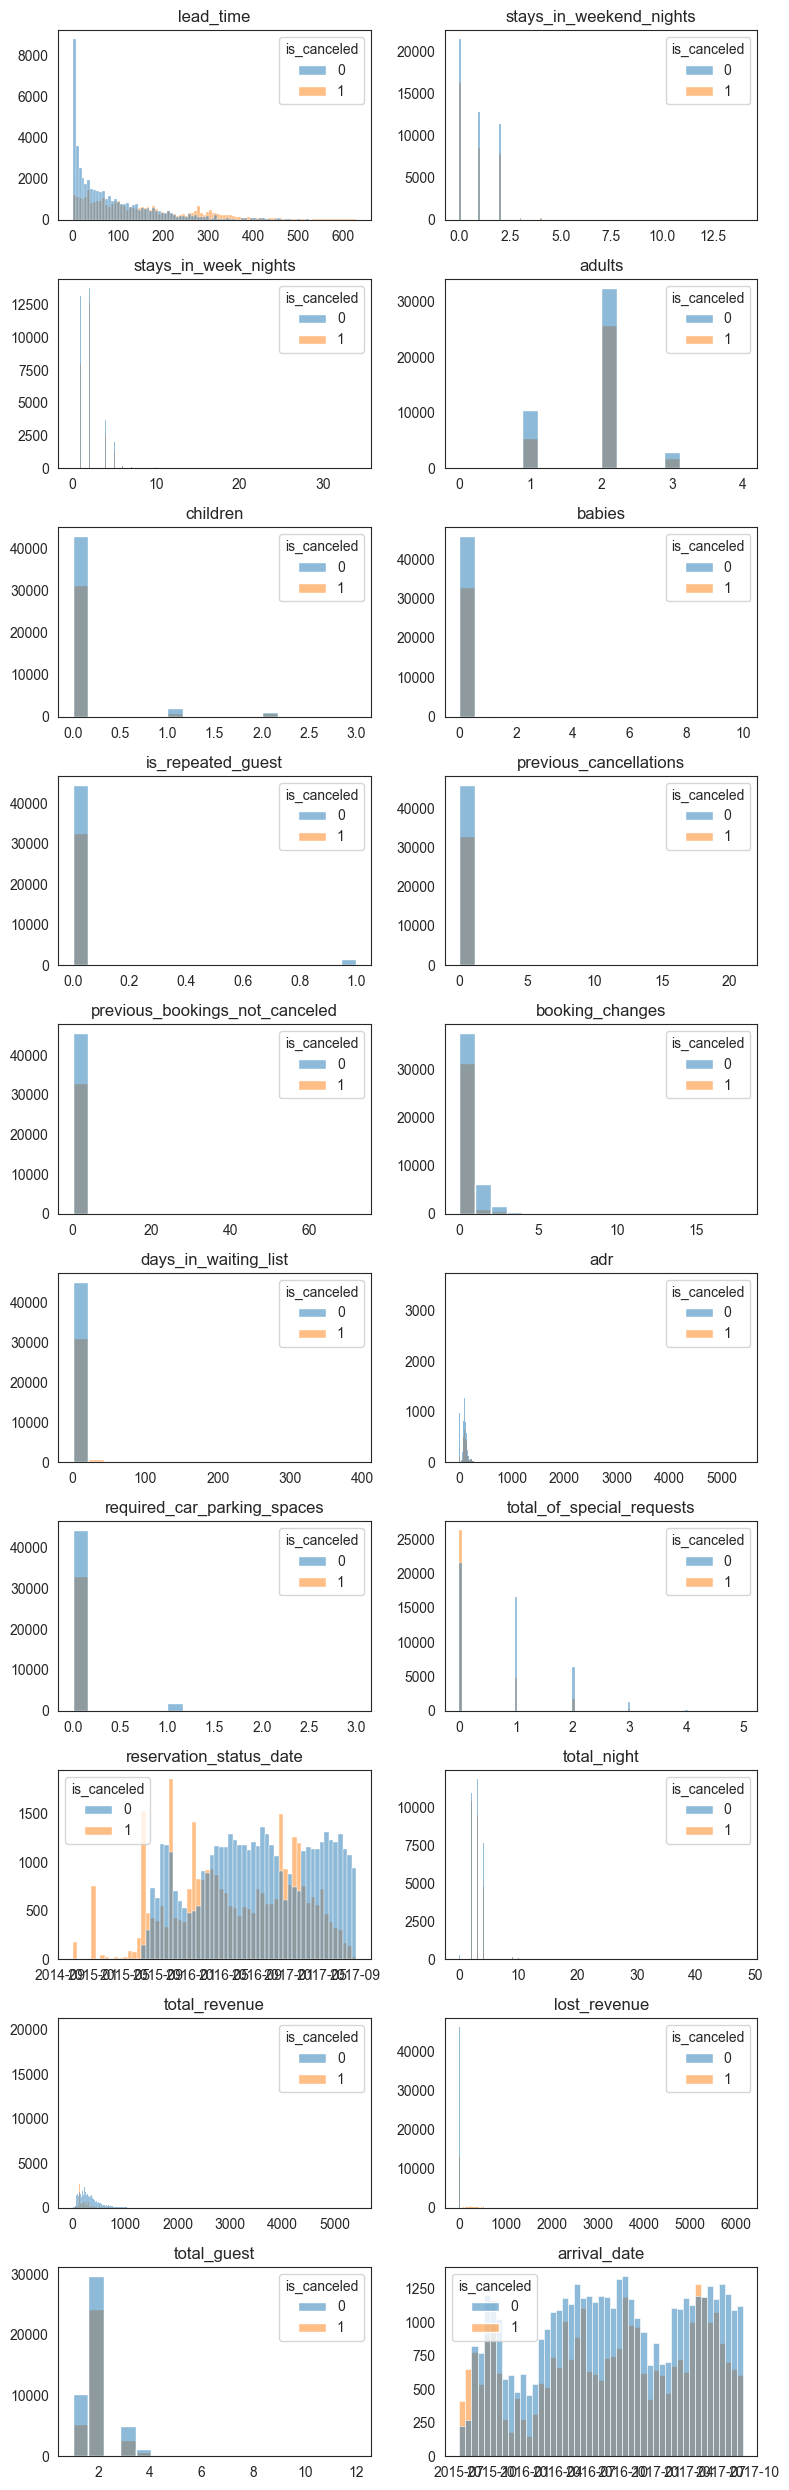

In [171]:
# visualisasi distribusi data numerikal
fig, axes = plt.subplots(10, 2, figsize=(8,25))    
axes = trim_axs(axes, len(num_var.columns))
col = num_var.columns

for ax, col, i in zip(axes, col, col):
    sns.histplot(data=df_clean, x=col, ax = ax, hue='is_canceled')
    ax.set_title(i)
    ax.set_ylabel('')
    ax.set_xlabel('')

fig.tight_layout()
plt.show()

Dari semua variabel diatas, ada beberapa variabel yang dapat kita dalami lebih lanjut. Hal ini dikarenakan variabel-variabel tersebut secara sekilas terlihat memiliki informasi yang menarik terkait karakteristik berkaitan dengan pembatalan pesanan.
Beberapa variabel diantaranya:
- Lead time
- Repeated guest
- Days in waiting list
- Required car parking spaces
- Total of Special Requests
- Arrival Date

**Lead Time**

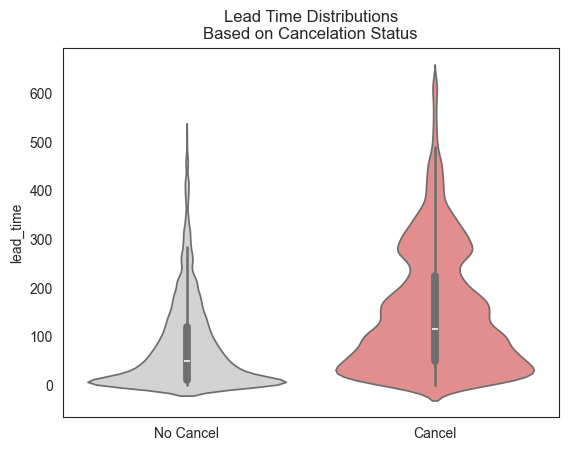

In [172]:
sns.violinplot(data=df_clean, x='is_canceled', y='lead_time', palette={"0": 'lightgrey', "1": 'lightcoral'})
plt.title('Lead Time Distributions\nBased on Cancelation Status')
plt.xticks([0,1],['No Cancel', 'Cancel'])
plt.xlabel('')
plt.show()

Dari plot diatas dapat dilihat, bahwa **tamu yang membatalkan pesanan memiliki rata-rata durasi waktu reservasi hingga kedatangan yang lebih lama** dibanding yang tidak membatalkan. Dengan waktu reservasi yang lama, pelanggan cenderung lebih mudah membatalkan karena banyak kemungkinan yang terjadi di masa depan.

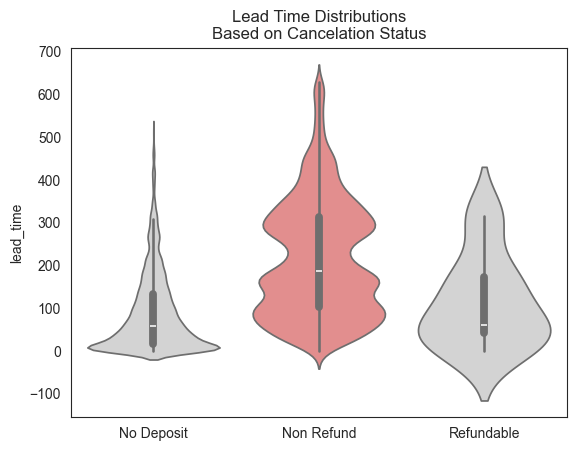

In [173]:
sns.violinplot(data=df_clean, x='deposit_type', y='lead_time',  palette={"No Deposit": 'lightgrey', "Refundable": 'lightgrey', "Non Refund": 'lightcoral'})
plt.title('Lead Time Distributions\nBased on Cancelation Status')
plt.xlabel('')
plt.show()

**Repeated Guests**

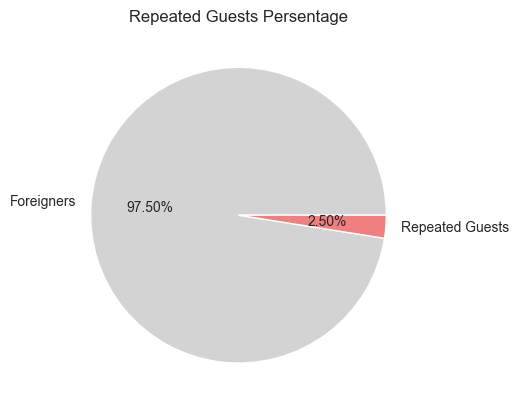

In [174]:
df_clean['is_repeated_guest'].value_counts().plot(kind='pie', autopct='%.2f%%', labels=['Foreigners','Repeated Guests'], colors=['lightgrey','lightcoral'])
plt.ylabel('')
plt.title('Repeated Guests Persentage');

Dari grafik di atas, diketahui bahwa mayoritas tamu yang memesan atau **97,5% nya belum pernah memesan hotel** ini sebelumnya. Hanya **2,5% saja yang pernah memesan** di hotel ini. Lalu bagaimana tingkat pembatalan antar keduanya?

In [175]:
df1 = df_confirm.groupby('is_repeated_guest').size().reset_index(name='no_cancel')
df2 = df_cancel.groupby('is_repeated_guest').size().reset_index(name='cancel')
dfgabung = pd.merge(df1, df2, on='is_repeated_guest')
dfgabung['cncl_prctg'] = round(dfgabung['cancel']/(dfgabung['cancel']+dfgabung['no_cancel'])*100,2)
dfgabung

,is_repeated_guest,no_cancel,cancel,cncl_prctg
0,0,44546,32640,42.29
1,1,1538,439,22.21


Ternyata tamu yang pernah berkunjung sebelumnya memiliki tingkat pembatalan yang lebih rendah, hanya sekitar **22,2%**. Berbanding terbalik dengan tamu yang baru memesan pertama kali, tingkat pembatalannya mencapai **42,2%**.

**Days in Waiting List**

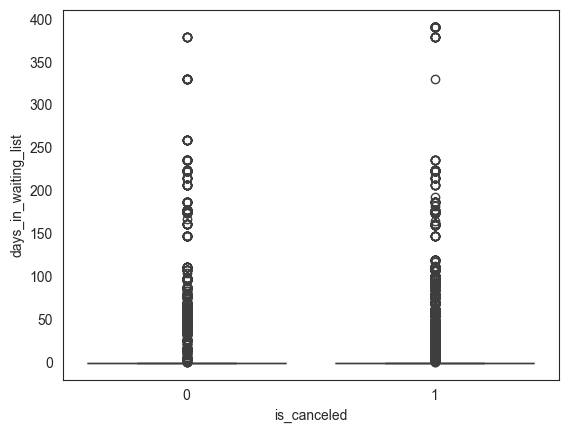

In [176]:
sns.boxplot(df_clean, x='is_canceled', y='days_in_waiting_list', palette='Greys');

Untuk waktu tunggu hingga dikonfirmasi, terlihat **tidak memiliki perbedaan yang signifikan** antar tamu yang membatalkan dan yang tidak. Sehingga kita bisa simpulkan, lamanya **waiting list tidak berpengaruh** terhadap **pembatalan pesanan**.

**Required Parking Spaces**

In [177]:
df_clean.groupby('is_canceled')['required_car_parking_spaces'].mean().reset_index(name='Avg_required_parking_spaces')

,is_canceled,Avg_required_parking_spaces
0,0,0.041815
1,1,0.000000


Tamu yang **membatalkan** pesanan **tidak pernah** melakukan permintaan tempat parkir.

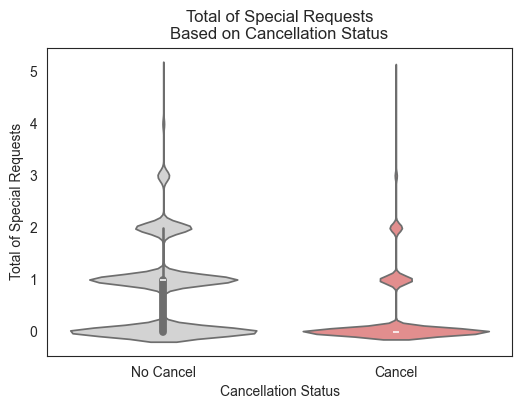

In [178]:
# Define palette with light coral and light grey colors
palette = {"1": 'lightcoral', "0": 'lightgrey'}

# Create the violin plot
plt.figure(figsize=(6, 4))
sns.violinplot(data=df_clean, x='is_canceled', y='total_of_special_requests', palette=palette)

# Set labels and title
plt.title('Total of Special Requests\nBased on Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Total of Special Requests')

# Rename x-axis ticks
plt.xticks([0, 1], ['No Cancel', 'Cancel'])
plt.show()

Tamu yang **membatalkan pesanan**, mayoritas **tidak memiliki special requests**.

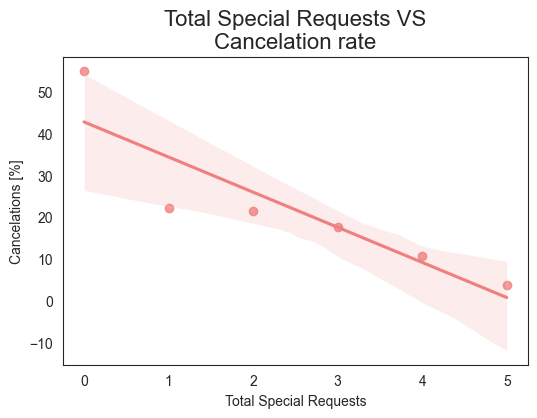

In [179]:
special_req = df_clean.groupby("total_of_special_requests")["is_canceled"].describe()

#show figure:
plt.figure(figsize=(6, 4))
sns.regplot(x=special_req.index, y=special_req["mean"].values * 100, color = 'lightcoral')
plt.title("Total Special Requests VS\nCancelation rate", fontsize=16)
plt.xlabel("Total Special Requests", fontsize=10)
plt.ylabel("Cancelations [%]", fontsize=10)
# plt.xlim(0,365)
plt.show()

In [180]:
special_req

,count,mean,std,min,25%,50%,75%,max
total_of_special_requests,,,,,,,,
0,47853.0,0.550018,0.497497,0.0,0.0,1.0,1.0,1.0
1,21377.0,0.220751,0.414763,0.0,0.0,0.0,0.0,1.0
2,8125.0,0.214031,0.410174,0.0,0.0,0.0,0.0,1.0
3,1584.0,0.176136,0.381056,0.0,0.0,0.0,0.0,1.0
4,198.0,0.106061,0.308696,0.0,0.0,0.0,0.0,1.0
5,26.0,0.038462,0.196116,0.0,0.0,0.0,0.0,1.0


In [181]:
df_cancel.groupby('total_of_special_requests')['lead_time'].median()

total_of_special_requests
0    132.0
1     72.0
2     90.0
3     87.0
4     61.0
5     51.0
Name: lead_time, dtype: float64

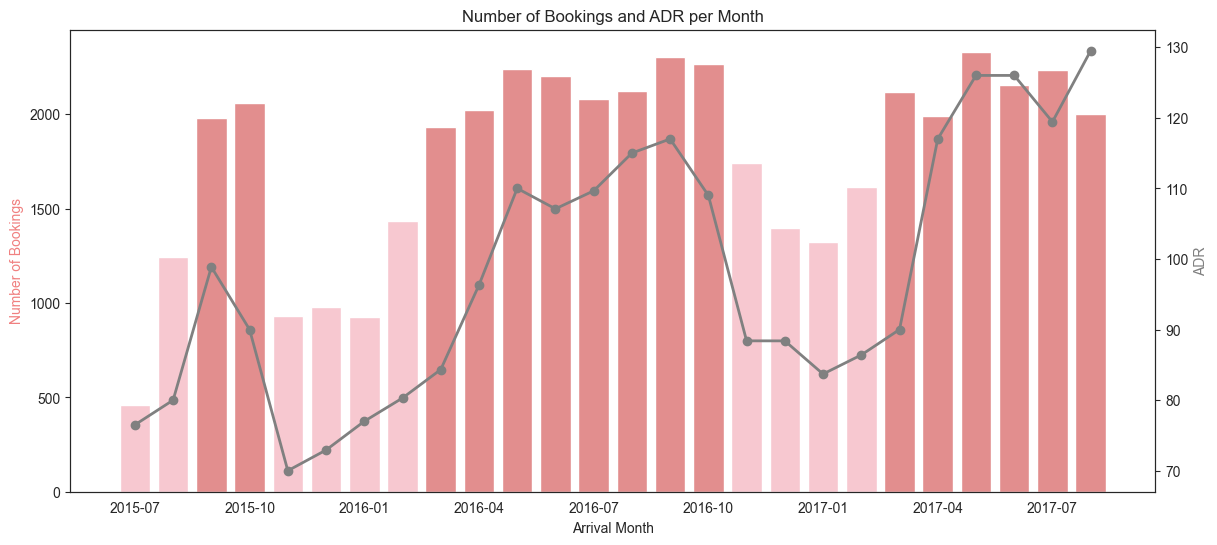

In [182]:
# Konversi tanggal ke format bulan
df_confirm['arrival_month'] = df_confirm['arrival_date'].dt.to_period('M').astype(str)

# Hitung jumlah pesanan per bulan
monthly_counts = df_confirm['arrival_month'].value_counts().sort_index()

# Hitung rata-rata jumlah tamu per bulan
average_guests = monthly_counts.mean()

# Tetapkan warna berdasarkan apakah jumlah tamu di atas atau di bawah rata-rata
colors = ['lightcoral' if count > average_guests else 'pink' for count in monthly_counts]

# Hitung cancel rate per bulan
adr_med = df_confirm.groupby('arrival_month')['adr'].median()

# Plot jumlah tamu per bulan dengan warna yang sudah diatur
plt.figure(figsize=(14, 6))
ax1 = plt.gca()
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette=colors, ax=ax1)
ax1.set_xlabel('Arrival Month')
ax1.set_ylabel('Number of Bookings', color='lightcoral')

# Plot cancel rate dengan sumbu y kedua
ax2 = ax1.twinx()
ax2.plot(adr_med.index, adr_med, color='grey', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('ADR', color='grey')

plt.title("Number of Bookings and ADR per Month")
xticks_interval = monthly_counts.index[::3]  # Ambil setiap 3 bulan
plt.xticks(xticks_interval, rotation=45, ha='right')

plt.show()

Hotel **paling banyak** menerima tamu terjadi selama **musim semi dan musim gugur**, dan **paling sedikit** pada **musim dingin**.

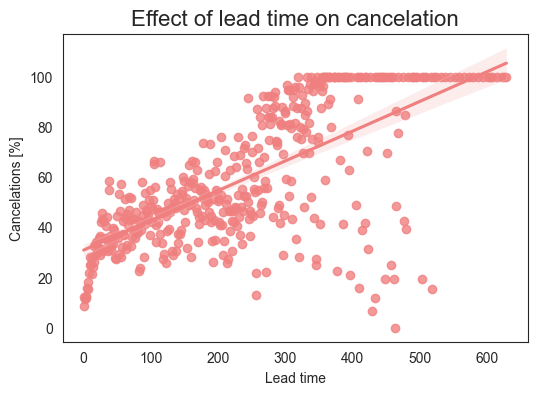

In [183]:
# group data for lead_time:
lead_cancel_data = df_clean.groupby("lead_time")["is_canceled"].describe()

#show figure:
plt.figure(figsize=(6, 4))
sns.regplot(x=lead_cancel_data.index, y=lead_cancel_data["mean"].values * 100, color = 'lightcoral')
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=10)
plt.ylabel("Cancelations [%]", fontsize=10)
# plt.xlim(0,365)
plt.show()

In [184]:
df_clean['deposit_type'].value_counts()

deposit_type
No Deposit    66275
Non Refund    12868
Refundable       20
Name: count, dtype: int64

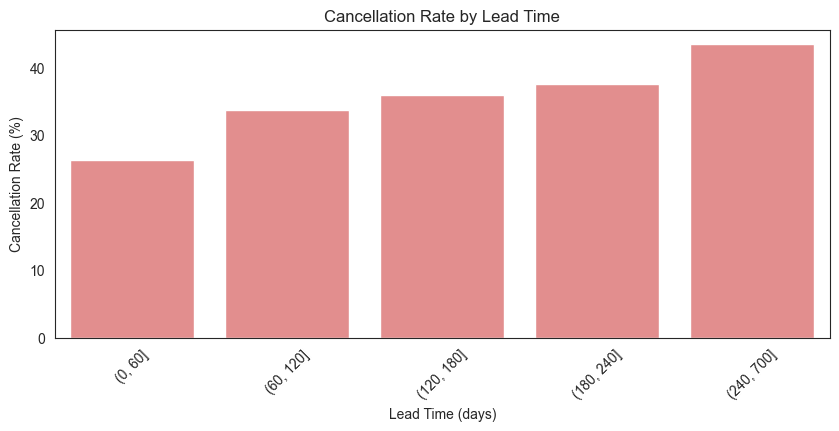

In [185]:
# Define bins for lead time
bins = [0, 60, 120, 180, 240, 700]

# Add a new column for lead time category
df_clean['lead_time_category'] = pd.cut(df_clean['lead_time'], bins)
df_nodeposit = df_clean[df_clean['deposit_type']!="Non Refund"]

# Calculate overall cancellation rate for each lead time category
cancellation_rates = df_nodeposit.groupby('lead_time_category')['is_canceled'].mean() * 100

# Plot cancellation rates
plt.figure(figsize=(10, 4))
sns.barplot(x=cancellation_rates.index, y=cancellation_rates.values, color='lightcoral')
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [186]:
# Hitung jumlah booking untuk setiap kategori lead_time_category
df_booking = df_clean[(df_clean['is_canceled'] == 0) | (df_clean['deposit_type'] != "Non Refund")].groupby('lead_time_category').size().reset_index(name='booking number')

# Hitung total booking number
total_booking = df_booking['booking number'].sum()

# Tambahkan kolom proporsi/persentase
df_booking['percentage'] = (df_booking['booking number'] / total_booking) * 100

# Tampilkan hasil
print(df_booking)

  lead_time_category  booking number  percentage
0            (0, 60]           30627   48.392296
1          (60, 120]           13810   21.820538
2         (120, 180]            8593   13.577399
3         (180, 240]            4845    7.655359
4         (240, 700]            5414    8.554409


#### Categorical Data Distribution

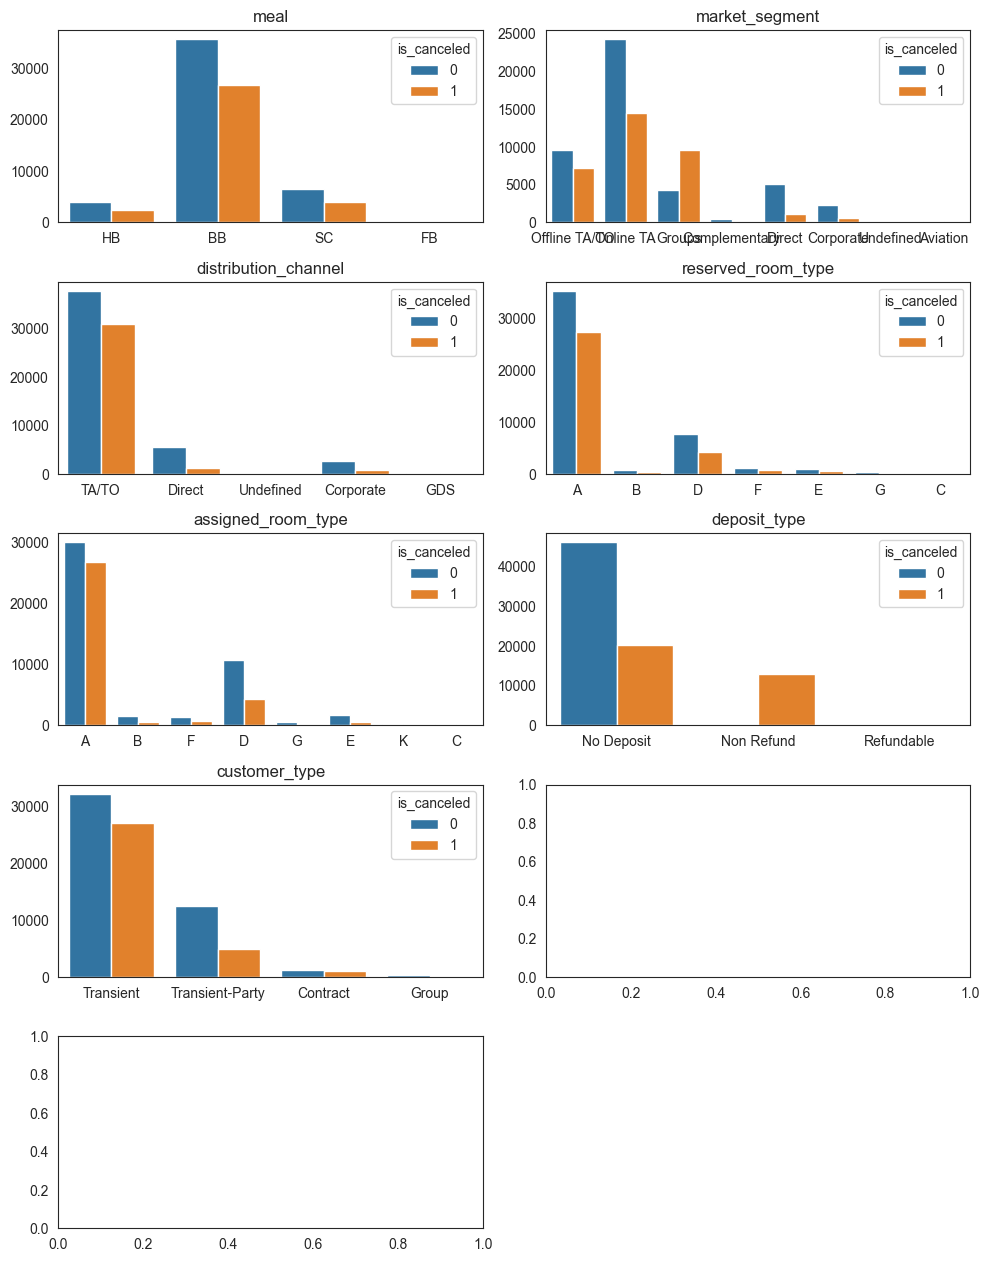

In [187]:
fig, axes = plt.subplots(6, 2, figsize=(10,15))    
axes = trim_axs(axes, len(cat_var.columns)-2)
col = ['meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type']

for ax, col, i in zip(axes, col, col):
    sns.countplot(data=df_clean, x=col, ax = ax, hue='is_canceled')
    ax.set_title(i)
    ax.set_ylabel('')
    ax.set_xlabel('')

fig.tight_layout()
plt.show()

Sama seperti data numerik, kita dapat menganalisis lebih lanjut terhadap variabel yang kemungkinan memiliki informasi yang menarik berkaitan dengan pembatalan pesanan, variabel-variabel tersebut diantaranya:
- Market segment
- Deposit type

**Market Segment**

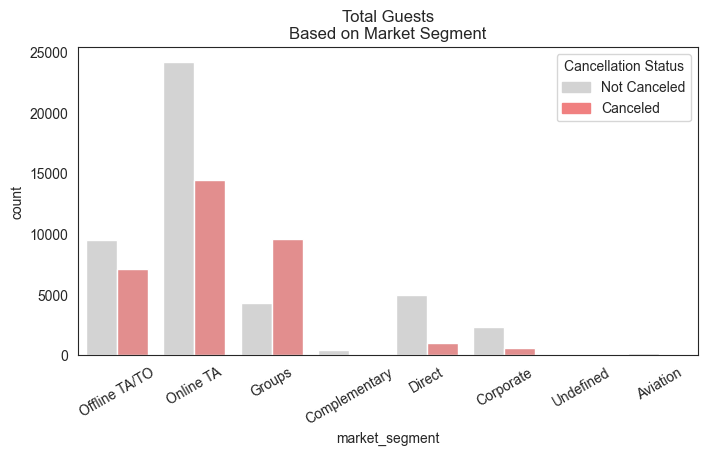

In [188]:
plt.figure(figsize=(8,4))
palette = {0: 'lightgrey', 1: 'lightcoral'}
sns.countplot(df_clean, x='market_segment', hue='is_canceled', palette=palette)

legend_colors = {'Not Canceled': 'lightgrey', 'Canceled': 'lightcoral'}
handles = [plt.Rectangle((0,0),1,1, color=legend_colors[label]) for label in legend_colors]

plt.legend(handles, legend_colors.keys(), title='Cancellation Status', loc='upper right')
plt.title('Total Guests\nBased on Market Segment')
plt.xticks(rotation=30);

Segmentasi **Online Travel Agent** menjadi segmen **paling banyak memesan** dengan cancelation rate tidak lebih dari separuhnya. Di lain sisi, segmen **Groups** menjadi segmen dengan **cancelation rate tertinggi**, dimana lebih dari separuh yang memesan melakukan pembatalan.

**Deposit Type**

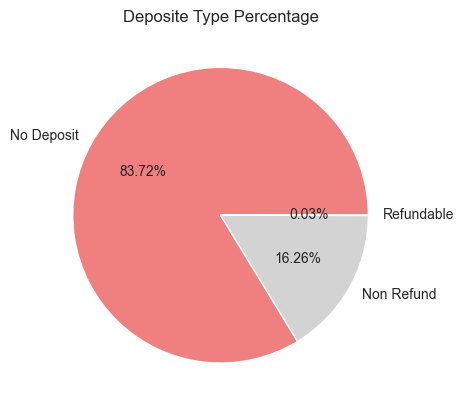

In [189]:
df_clean.groupby('deposit_type').size().plot(kind='pie', autopct='%.2f%%', colors=['lightcoral', 'lightgrey', 'grey'])
plt.title('Deposite Type Percentage');

Tipe pemesanan **No Deposit** menjadi yang **paling favorit** bagi pelanggan yaitu **83.7%**, diikuti dengan **Non Refund 16.2%**, dan sisanya **0.03% Refundable**. Lalu bagaimana tingkat pembatalan dari ketiga tipe tersebut?

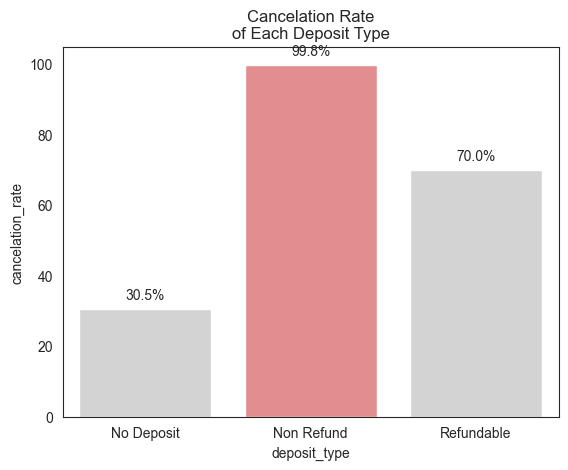

In [190]:
df_deposit = df_clean.groupby('deposit_type').size().reset_index(name='Total Guests')
df_deposit_cncl = df_cancel.groupby('deposit_type').size().reset_index(name='Total Cancel')
df_deposit_merge = pd.merge(df_deposit, df_deposit_cncl, on='deposit_type')
df_deposit_merge['cancelation_rate'] = round(df_deposit_merge['Total Cancel']/df_deposit_merge['Total Guests']*100,2)
colors = ['lightcoral' if x == df_deposit_merge['cancelation_rate'].max() else 'lightgrey' for x in df_deposit_merge['cancelation_rate']]

ax = sns.barplot(df_deposit_merge, x='deposit_type', y='cancelation_rate', palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Cancelation Rate\nof Each Deposit Type');

Hampir seluruh tamu yang memilih tipe **Non Refund** melakukan **pembatalan pesanan**, hingga mencapai **99,8%** tingkat pembatalan. Mirip dengan Non Refund, **Refundable** juga memiliki tingkat pembatalan sangat tinggi yaitu **70%**, namun karena sangat sedikit tamu yang memilih refundable sehingga tidak terlalu berpengaruh.

### Correlation for Each Variables

Dengan melihat korelasi antar variabel, kita dapat melihat **arah dan besarnya hubungan antar variabel**. Dengan mengetahui korelasinya, ini bisa menjadi **penduga awal** untuk mengetahui faktor apa saja yang mempengaruhi pembatalan pesanan.

In [191]:
# Membuat data frame baru dengan menyalin dari dataset sebelumnya
df_clean2 = df_clean.copy()
df_clean2.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,...,total_revenue,lost_revenue,guest_origin,total_guest,arrival_date,arrival_month,month,year,semester,lead_time_category
40060,0,6,0,2,1,0,0,HB,PRT,Offline TA/TO,...,0.0,0.0,domestic,1,2015-07-01,2015-07,7,2015,Semester 2 2015,"(0, 60]"
40061,1,88,0,4,2,0,0,BB,PRT,Online TA,...,0.0,306.0,domestic,2,2015-07-01,2015-07,7,2015,Semester 2 2015,"(60, 120]"
40062,1,65,0,4,1,0,0,BB,PRT,Online TA,...,0.0,272.0,domestic,1,2015-07-01,2015-07,7,2015,Semester 2 2015,"(60, 120]"
40063,1,92,2,4,2,0,0,BB,PRT,Online TA,...,0.0,459.0,domestic,2,2015-07-01,2015-07,7,2015,Semester 2 2015,"(60, 120]"
40064,1,100,0,2,2,0,0,BB,PRT,Online TA,...,0.0,153.0,domestic,2,2015-07-02,2015-07,7,2015,Semester 2 2015,"(60, 120]"


In [192]:
df_clean2.columns

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'total_night', 'total_revenue',
       'lost_revenue', 'guest_origin', 'total_guest', 'arrival_date',
       'arrival_month', 'month', 'year', 'semester', 'lead_time_category'],
      dtype='object')

In [193]:
# menghapus kolom yang tidak dibutuhkan
df_clean2 = df_clean2.drop(['total_revenue','lost_revenue', 'stays_in_weekend_nights', 'stays_in_week_nights', 'month', 'year'], axis=1)

In [194]:
# Label Encoding
# Kolom-kolom yang akan di-Label Encoding
kolom_kategorik = ['meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type','guest_origin']

# Membuat peta mapping untuk setiap kolom kategorikal
meal_map = {'Undefined': 0, 'BB': 1, 'FB': 2, 'HB': 3, 'SC': 4}
market_segment_map = {'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3, 'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7}
distribution_channel_map = {'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3, 'GDS': 4}
reserved_room_type_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'L': 8}
assigned_room_type_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10}
deposit_type_map = {'No Deposit': 0, 'Refundable': 1, 'Non Refund': 2}
customer_type_map = {'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3}
guest_map = {'domestic': 0, 'international': 1}

# Menyusun peta-peta mapping ke dalam satu variabel list
my_map = [meal_map, market_segment_map, distribution_channel_map, reserved_room_type_map, assigned_room_type_map, deposit_type_map, customer_type_map, guest_map]

# Melakukan Label Encoding untuk setiap kolom kategorikal
for kolom, my_map in zip(kolom_kategorik, my_map):
    df_clean2[kolom] = df_clean2[kolom].map(my_map)

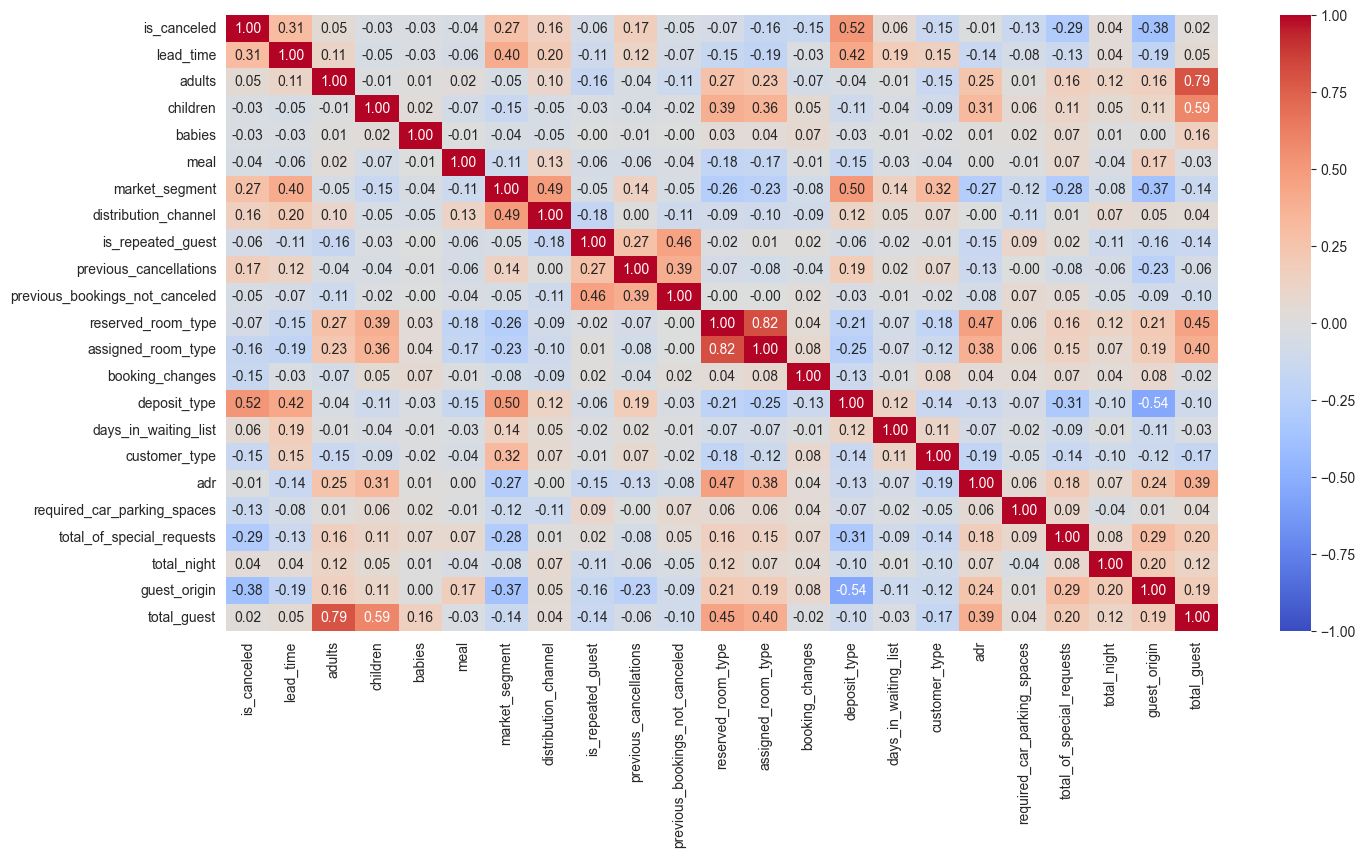

In [195]:
plt.figure(figsize=(16,8))
sns.heatmap(df_clean2.corr(numeric_only=True), annot=True, fmt= '.2f', vmin=-1, cmap='coolwarm');

In [196]:
variabel_kor = df_clean2.corr(numeric_only = True).drop('is_canceled')['is_canceled'].abs().sort_values(ascending=False).reset_index(name='correlation')
print('10 variabel yang memiliki hubungan terbesar terhadap pembatalan pesanan :')
print(variabel_kor.head(10))

10 variabel yang memiliki hubungan terbesar terhadap pembatalan pesanan :
                       index  correlation
0               deposit_type     0.518501
1               guest_origin     0.376661
2                  lead_time     0.308783
3  total_of_special_requests     0.294250
4             market_segment     0.269723
5     previous_cancellations     0.166679
6         assigned_room_type     0.163066
7       distribution_channel     0.161491
8            booking_changes     0.150418
9              customer_type     0.147905


**Tipe deposit** memiliki **hubungan paling erat** terhadap pembatalan pesanan mencapai **0.51**, diikuti dengan durasi **lead time** dengan **0.30**, dan **total special requests 0.29**.
Lalu, bagaimana pengaruhnya terhadap pembatalan pesanan? kita dapat menganalisis lebih lanjut dengan menggunakan model prediktif, dan mengetahui faktor apa saja yang paling berpengaruh.

## Classification

**Membagi data menjadi data latih dan data uji, lalu mentransformasinya**

In [197]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79163 entries, 40060 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   is_canceled                     79163 non-null  int64         
 1   lead_time                       79163 non-null  int64         
 2   adults                          79163 non-null  int64         
 3   children                        79163 non-null  int32         
 4   babies                          79163 non-null  int64         
 5   meal                            79163 non-null  int64         
 6   country                         79163 non-null  object        
 7   market_segment                  79163 non-null  int64         
 8   distribution_channel            79163 non-null  int64         
 9   is_repeated_guest               79163 non-null  int64         
 10  previous_cancellations          79163 non-null  int64         
 11  pr

In [198]:
# Pisahkan fitur dan target
X = df_clean2.drop(['is_canceled', 'country', 'reservation_status_date', 'arrival_date', 'adults', 'children', 'babies', 'arrival_month', 'semester','lead_time_category'], axis=1)  # Fitur
y = df_clean2['is_canceled']  # Target

# Pisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Melakukan simulasi untuk mencari model terbaik**

In [199]:
# Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
log_predict = logmodel.predict(X_test)
acc = round(accuracy_score(y_test, log_predict) , 3)
prec = round(precision_score(y_test, log_predict),3)
rec = round(recall_score(y_test, log_predict),3)
f1 = round(f1_score(y_test, log_predict),3)

model_names =['Logistic Regression']
result_log = pd.DataFrame({'Accuracy':acc,'Precision':prec,'Recall':rec, 'f1':f1}, index=model_names)

# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)
acc = round(accuracy_score(y_test, dtc_predict) , 3)
prec = round(precision_score(y_test, dtc_predict),3)
rec = round(recall_score(y_test, dtc_predict),3)
f1 = round(f1_score(y_test, dtc_predict),3)

model_names =['Decision Tree']
result_dtc = pd.DataFrame({'Accuracy':acc,'Precision':prec,'Recall':rec, 'f1':f1}, index=model_names)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
acc = round(accuracy_score(y_test, rf_predict) , 3)
prec = round(precision_score(y_test, rf_predict),3)
rec = round(recall_score(y_test, rf_predict),3)
f1 = round(f1_score(y_test, rf_predict),3)

model_names =['Random Forest']
result_rf = pd.DataFrame({'Accuracy':acc,'Precision':prec,'Recall':rec, 'f1':f1}, index=model_names)

# comparing model
result_compare= pd.concat([result_log,result_dtc,result_rf],axis=0)
result_compare

,Accuracy,Precision,Recall,f1
Logistic Regression,0.792,0.828,0.632,0.717
Decision Tree,0.833,0.790,0.814,0.802
Random Forest,0.865,0.859,0.808,0.833


**Model random forest** menjadi **model terbaik** dibanding 2 model lainnya, dilihat dari evaluasi kinerjanya seperti **akurasi, presisi, recall, dan f1**. Sehingga model terbaik yang akan digunakan untuk memprediksi status pembatalan adalah dengan **model random forest**.

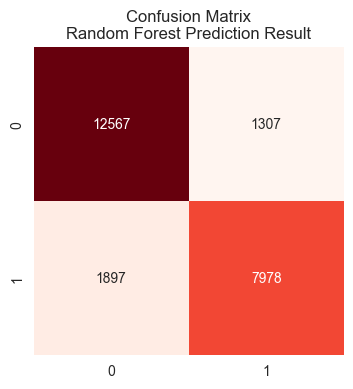

In [200]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, rf_predict), annot=True, fmt='', cmap='Reds', cbar=False)
plt.title('Confusion Matrix\nRandom Forest Prediction Result');

ROC AUC: 0.9393842922651058


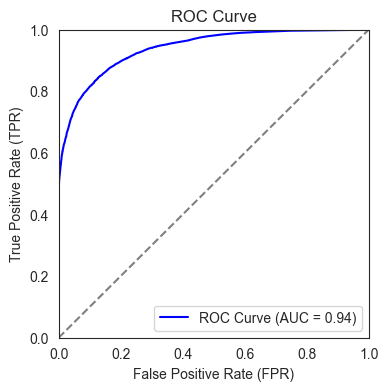

In [201]:
from sklearn.metrics import roc_auc_score, roc_curve

y_scores = rf.predict_proba(X_test)[:, 1]

# Menghitung ROC AUC
roc_auc = roc_auc_score(y_test, y_scores)
print("ROC AUC:", roc_auc)

# Menghitung nilai FPR, TPR, dan threshold
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Membuat plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**AUC = 0.94** adalah indikasi bahwa model memiliki **performa yang sangat baik**. Dalam konteks model klasifikasi, AUC di atas 0.9 umumnya dianggap sangat baik, antara 0.8-0.9 baik, dan antara 0.7-0.8 cukup baik.
Dengan akurasi dan ROC yang tinggi, model Random Forest adalah pilihan terbaik untuk memprediksi pembatalan pesanan hotel.

In [202]:
# Lihat feature importance
feature_importance = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

print(importance_df)

                           Feature  Importance
0                        lead_time    0.222669
13                             adr    0.169169
10                    deposit_type    0.137489
17                    guest_origin    0.077095
15       total_of_special_requests    0.073829
16                     total_night    0.062205
2                   market_segment    0.056071
12                   customer_type    0.035407
5           previous_cancellations    0.034401
8               assigned_room_type    0.024480
9                  booking_changes    0.022562
18                     total_guest    0.020804
3             distribution_channel    0.015748
1                             meal    0.015200
7               reserved_room_type    0.013502
14     required_car_parking_spaces    0.008443
6   previous_bookings_not_canceled    0.004498
11            days_in_waiting_list    0.003973
4                is_repeated_guest    0.002456


**Lead time** menjadi **faktor yang paling berpengaruh** terhadap pembatalan pesanan sebesar **23%**, diikuti **rata-rata harga harian(adr) 17%**, dan **tipe deposit 14%**.

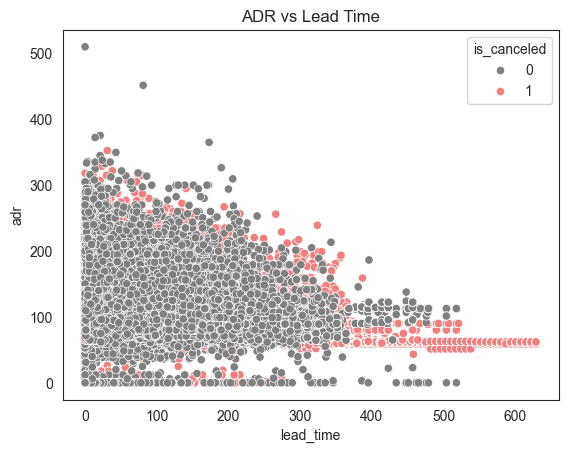

In [203]:
sns.scatterplot(df_clean2[df_clean2['adr']<1000], x='lead_time', y='adr', hue='is_canceled', palette={0: 'grey', 1: 'lightcoral'})
plt.title('ADR vs Lead Time');

Tamu yang membatalkan pesanan kebanyakan memiliki **durasi lead time yang panjang** dengan **harga pesanan yang murah**.

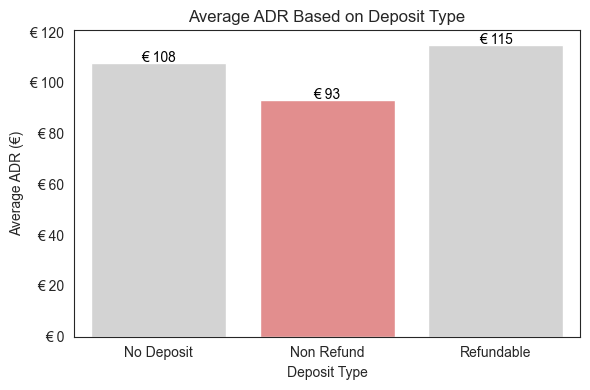

In [204]:
from matplotlib.ticker import FuncFormatter

# Calculate average ADR based on deposit_type
average_adr = df_clean.groupby('deposit_type')['adr'].mean().reset_index()

# Determine the color for each bar based on deposit_type
colors = ['lightcoral' if x == average_adr['adr'].min() else 'lightgrey' for x in average_adr['adr']]

# Create the bar plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=average_adr, x='deposit_type', y='adr', palette=colors)

# Set labels and title
plt.title('Average ADR Based on Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Average ADR (€)')  # Adding Euro notation

# Format y-axis labels with Euro symbol
formatter = FuncFormatter(lambda x, _: '€ {:,.0f}'.format(x))  # Define formatter function
ax.yaxis.set_major_formatter(formatter)  # Apply formatter to y-axis

# Adding value labels on top of each bar
for index, row in average_adr.iterrows():
    ax.text(index, row['adr'] + 0.5, '€ {:.0f}'.format(row['adr']), ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

Tamu banyak melakukan pembatalan pada tipe Non Refund, karena memiliki **rata-rata harga paling rendah** dibanding dengan tipe lain.

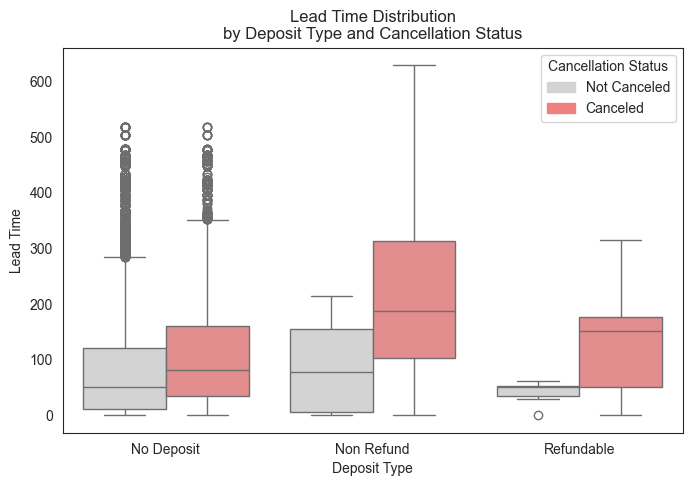

In [205]:
# Define palette with lightgrey and lightcoral colors
palette = {0: 'lightgrey', 1: 'lightcoral'}

# Create the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x='deposit_type', y='lead_time', hue='is_canceled', palette=palette)

# Set labels and title
plt.title('Lead Time Distribution\nby Deposit Type and Cancellation Status')
plt.xlabel('Deposit Type')
plt.ylabel('Lead Time')

# Custom legend with colored patches
legend_colors = {'Not Canceled': 'lightgrey', 'Canceled': 'lightcoral'}
handles = [plt.Rectangle((0,0),1,1, color=legend_colors[label]) for label in legend_colors]
plt.legend(handles, legend_colors.keys(), title='Cancellation Status', loc='upper right')

plt.show()

Selain karena **harganya murah**, tipe non refund memiliki **rata-rata lead time paling lama**, artinya banyak tamu yang memesan jauh-jauh hari. Hal ini membuat tamu lebih memiliki peluang yang besar untuk membatalkan pesanan.

## Suggestions

- **Membatasi lead time** menjadi maksimal pemesanan **4 bulan** untuk tipe deposit **No Deposit**
- **Membatasi lead time** menjadi maksimal pemesanan **7 bulan** untuk tipe deposit **No Refund**
- **Meningkatkan pelayanan**, agar tamu dapat datang kembali
- Melakukan **promosi dan diskon** pada **spring dan autumn** karena musim ini banyak tamu yang menginap
- **Mensortir dan memfilter travel agent** yang sering melakukan pembatalan

## Clustering

In [206]:
df_clean3 = df_clean2.drop(['country', 'reservation_status_date'], axis=1)
df_clean3 = df_clean3[df_clean3['is_canceled']==0]
df_clean3 = df_clean3.drop('is_canceled',axis=1)
df_clean3.head()

,lead_time,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,adr,required_car_parking_spaces,total_of_special_requests,total_night,guest_origin,total_guest,arrival_date,arrival_month,semester,lead_time_category
40060,6,1,0,0,3,3,2,0,0,0,...,0.00,0,0,2,0,1,2015-07-01,2015-07,Semester 2 2015,"(0, 60]"
40066,3,1,0,0,3,5,2,0,0,0,...,58.67,0,0,3,0,1,2015-07-02,2015-07,Semester 2 2015,"(0, 60]"
40070,43,2,0,0,3,5,2,0,0,0,...,86.00,0,0,2,0,2,2015-07-03,2015-07,Semester 2 2015,"(0, 60]"
40071,43,2,0,0,3,5,2,0,0,0,...,43.00,0,0,2,0,2,2015-07-03,2015-07,Semester 2 2015,"(0, 60]"
40072,43,2,0,0,3,5,2,0,0,0,...,86.00,0,0,2,0,2,2015-07-03,2015-07,Semester 2 2015,"(0, 60]"


In [207]:
df_confirm2 = df_clean2.copy()
df_confirm2 = df_confirm2[df_confirm2['is_canceled']==0]

In [208]:
df_clstr=df_confirm2[['total_guest','adr','total_night']]
df_clstr.head()

,total_guest,adr,total_night
40060,1,0.00,2
40066,1,58.67,3
40070,2,86.00,2
40071,2,43.00,2
40072,2,86.00,2


In [209]:
df_clstr_scaled = pd.DataFrame(scaler.fit_transform(df_clstr), columns=df_clstr.columns, index=df_clstr.index)
df_clstr_scaled.head()

,total_guest,adr,total_night
40060,-1.414678,-2.632594,-0.541370
40066,-1.414678,-1.175975,0.048429
40070,0.088458,-0.497444,-0.541370
40071,0.088458,-1.565019,-0.541370
40072,0.088458,-0.497444,-0.541370


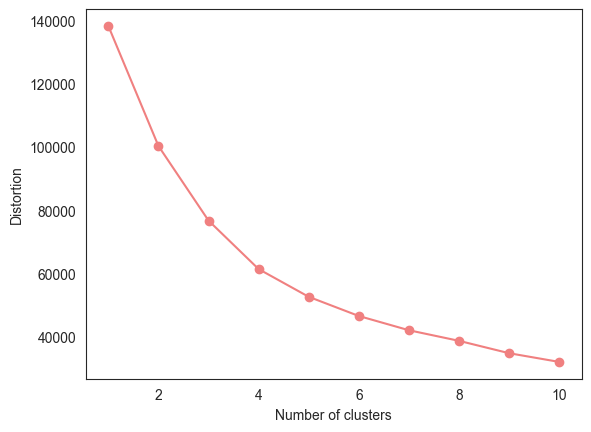

In [210]:
# membuat elbow curve untuk mencari jumlah klater terbaik

from sklearn.cluster import KMeans

distortions = []

for i  in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_clstr_scaled)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o', color='lightcoral')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [211]:
km = KMeans(n_clusters=3,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)

In [212]:
clusters = km.fit(df_clstr_scaled)
labels = km.labels_

In [213]:
df_confirm['Clusters'] = labels

In [214]:
df_confirm.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,total_revenue,lost_revenue,guest_origin,total_guest,arrival_date,arrival_month,month,year,semester,Clusters
40060,6,0,2,1,0,0,HB,PRT,Offline TA/TO,TA/TO,...,0.00,0.0,domestic,1,2015-07-01,2015-07,7,2015,Semester 2 2015,0
40066,3,0,3,1,0,0,HB,PRT,Groups,TA/TO,...,176.01,0.0,domestic,1,2015-07-02,2015-07,7,2015,Semester 2 2015,0
40070,43,0,2,2,0,0,HB,PRT,Groups,TA/TO,...,172.00,0.0,domestic,2,2015-07-03,2015-07,7,2015,Semester 2 2015,0
40071,43,0,2,2,0,0,HB,PRT,Groups,TA/TO,...,86.00,0.0,domestic,2,2015-07-03,2015-07,7,2015,Semester 2 2015,0
40072,43,0,2,2,0,0,HB,PRT,Groups,TA/TO,...,172.00,0.0,domestic,2,2015-07-03,2015-07,7,2015,Semester 2 2015,0


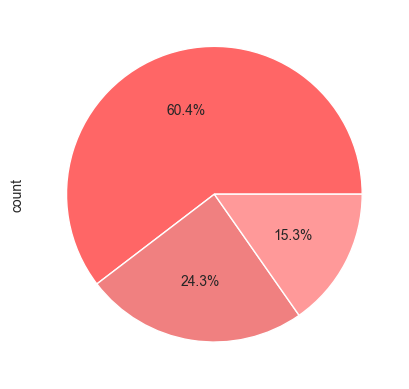

In [215]:
# proporsi klaster
df_confirm['Clusters'].value_counts().plot(kind='pie', autopct="%1.1f%%", colors = ['#FF6666','lightcoral', '#FF9999'], labels=None);

In [216]:
# rata-rata ADR berdasar klaster
df_confirm.groupby('Clusters')['adr'].mean()

Clusters
0     94.093885
1     98.690754
2    164.906242
Name: adr, dtype: float64

In [217]:
# rata-rata lama malam tamu menginap per klaster
df_confirm.groupby('Clusters')['total_night'].mean()

Clusters
0    2.105401
1    5.024436
2    2.774276
Name: total_night, dtype: float64

In [218]:
# median lead time per klaster
df_confirm.groupby('Clusters')['lead_time'].median()

Clusters
0    41.0
1    74.0
2    45.0
Name: lead_time, dtype: float64

In [219]:
# median jumlah tamu per klaster
df_confirm.groupby('Clusters')['total_guest'].median()

Clusters
0    2.0
1    2.0
2    3.0
Name: total_guest, dtype: float64

In [220]:
# proporsi market segment berdasar klaster
df_confirm.groupby('Clusters')['market_segment'].value_counts()

Clusters  market_segment
0         Online TA         11950
          Offline TA/TO      6628
          Groups             3663
          Direct             2782
          Corporate          2210
          Complementary       449
          Aviation            145
1         Online TA          6971
          Offline TA/TO      2456
          Direct             1083
          Groups              563
          Corporate            84
          Aviation             38
          Complementary        18
2         Online TA          5271
          Direct             1151
          Offline TA/TO       462
          Groups              113
          Corporate            43
          Complementary         4
Name: count, dtype: int64

In [221]:
# proporsi asal negara tamu berdasar klaster
country_counts = df_confirm.groupby(['Clusters', 'country']).size()
country_counts = country_counts.reset_index(name='count')
top_countries = country_counts.groupby('Clusters').apply(lambda x: x.nlargest(3, 'count'))
top_countries = top_countries.reset_index(drop=True)

print(top_countries)

   Clusters country  count
0         0     PRT   8442
1         0     FRA   3675
2         0     DEU   2837
3         1     FRA   2228
4         1     DEU   1612
5         1     PRT   1261
6         2     FRA   1166
7         2     PRT   1090
8         2     ESP    711


In [222]:
df_confirm.groupby('Clusters')['country'].describe()

,count,unique,top,freq
Clusters,,,,
0,27827,135,PRT,8442
1,11213,104,FRA,2228
2,7044,98,FRA,1166


## Addition

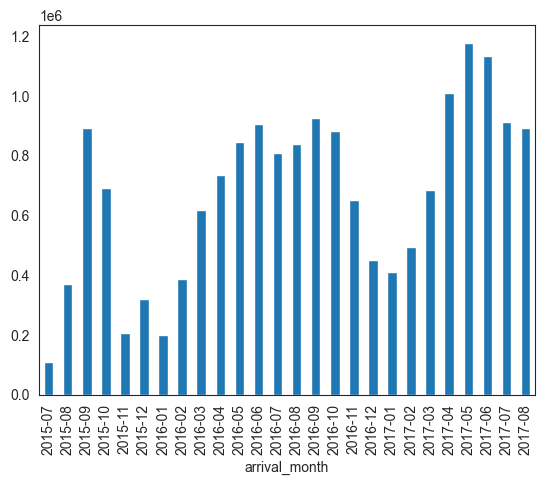

In [223]:
# total revenue perbulan
df_clean.groupby('arrival_month')['total_revenue'].sum().plot(kind='bar');

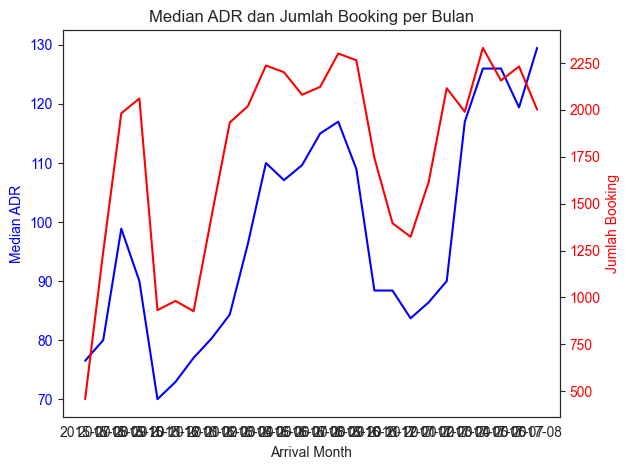

In [224]:
# Menghitung median ADR per bulan
adr_median = df_confirm.groupby('arrival_month')['adr'].median()

# Menghitung jumlah booking per bulan
booking_count = df_confirm.groupby('arrival_month').size()

# Membuat plot ADR
fig, ax1 = plt.subplots()

ax1.plot(adr_median.index, adr_median, color='blue', label='Median ADR')
ax1.set_xlabel('Arrival Month')
ax1.set_ylabel('Median ADR', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Membuat plot jumlah booking pada sumbu y yang lain
ax2 = ax1.twinx()
ax2.plot(booking_count.index, booking_count, color='red', label='Jumlah Booking')
ax2.set_ylabel('Jumlah Booking', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Menambahkan judul dan menampilkan plot
plt.title('Median ADR dan Jumlah Booking per Bulan')
fig.tight_layout()
plt.show()

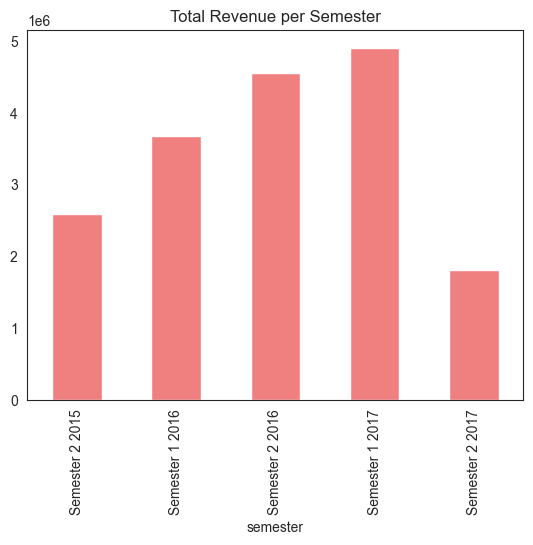

In [225]:
# # Langkah 4: Membuat kolom untuk mengurutkan semester dengan benar
df_clean['semester_order'] = df_clean['year'] * 2 + df_clean['month'].apply(lambda x: 0 if x <= 6 else 1)

# Langkah 5: Kelompokkan data berdasarkan semester dan hitung total revenue
semester_revenue = df_clean.groupby(['semester','semester_order'])['total_revenue'].sum().reset_index()

# Langkah 6: Mengurutkan berdasarkan semester_order dan menghilangkan kolom semester_order dari plot
semester_revenue = semester_revenue.sort_values('semester_order').set_index('semester')

# Langkah 7: Plot bar chart
semester_revenue['total_revenue'].plot(kind='bar', title='Total Revenue per Semester', color='lightcoral');

In [226]:
semester_revenue

,semester_order,total_revenue
semester,,
Semester 2 2015,4031,2590674.64
Semester 1 2016,4032,3687687.60
Semester 2 2016,4033,4556498.81
Semester 1 2017,4034,4909868.71
Semester 2 2017,4035,1806885.08


In [227]:
# Langkah 8: Menghitung persentase pertumbuhan per semester
semester_revenue['growth_rate'] = semester_revenue['total_revenue'].pct_change() * 100

# Langkah 9: Mengisi NaN dengan 0 untuk pertumbuhan semester pertama (karena tidak ada semester sebelumnya)
semester_revenue['growth_rate'] = semester_revenue['growth_rate'].fillna(0)

# Langkah 10: Tampilkan hasil
semester_revenue

,semester_order,total_revenue,growth_rate
semester,,,
Semester 2 2015,4031,2590674.64,0.000000
Semester 1 2016,4032,3687687.60,42.344683
Semester 2 2016,4033,4556498.81,23.559783
Semester 1 2017,4034,4909868.71,7.755294
Semester 2 2017,4035,1806885.08,-63.198913


In [228]:
df_clean[df_clean['is_canceled']==0].groupby(['semester', 'semester_order']).size().reset_index(name='booking_number')

,semester,semester_order,booking_number
0,Semester 1 2016,4032,10753
1,Semester 1 2017,4034,11532
2,Semester 2 2015,4031,7655
3,Semester 2 2016,4033,11910
4,Semester 2 2017,4035,4234


In [229]:
((11910-11532)/11532)*100

3.2778355879292405

In [230]:
12844/20235

0.6347417840375587

In [231]:
df_clean.groupby('arrival_month')['total_revenue'].sum().reset_index()

,arrival_month,total_revenue
0,2015-07,109353.69
1,2015-08,370427.49
2,2015-09,893929.57
3,2015-10,690633.65
4,2015-11,207542.34
5,2015-12,318787.90
6,2016-01,200432.07
7,2016-02,386245.98
8,2016-03,616314.92
9,2016-04,733866.36


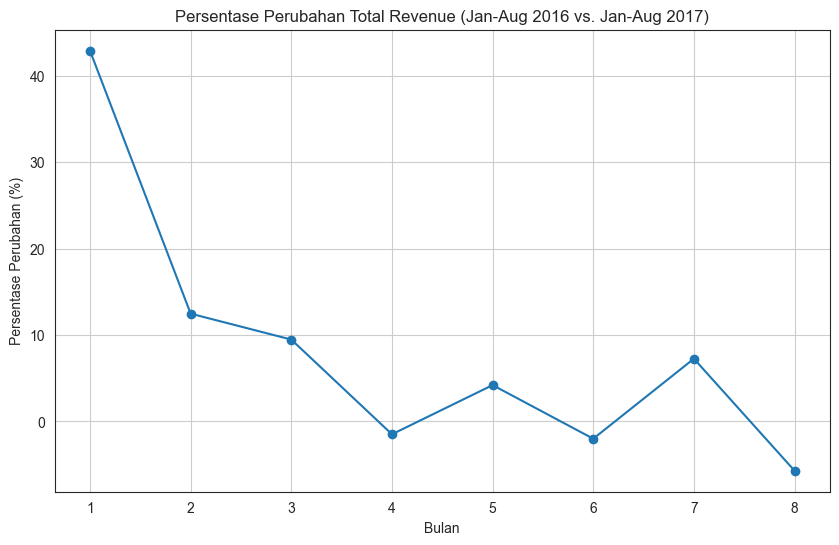

In [232]:
# Konversi 'arrival_month' ke datetime jika belum dilakukan
df_confirm['arrival_month'] = pd.to_datetime(df_confirm['arrival_month'])

# Filter data untuk Januari-Agustus 2016 dan 2017
df_2016 = df_confirm[(df_confirm['arrival_month'] >= '2016-01-01') & (df_confirm['arrival_month'] <= '2016-08-31')]
df_2017 = df_confirm[(df_confirm['arrival_month'] >= '2017-01-01') & (df_confirm['arrival_month'] <= '2017-08-31')]

# Group by 'arrival_month' dan hitung total revenue
monthly_revenue_2016 = df_2016.groupby('month').size().reset_index(name='total_guest')
monthly_revenue_2017 = df_2017.groupby('month').size().reset_index(name='total_guest')

# Gabungkan data berdasarkan bulan
df_combined = pd.merge(monthly_revenue_2016, monthly_revenue_2017, on='month', suffixes=('_2016', '_2017'))

# Hitung persentase perubahan
df_combined['percentage_change'] = ((df_combined['total_guest_2017'] - df_combined['total_guest_2016']) / df_combined['total_guest_2016']) * 100

# Plot perubahan persentase
plt.figure(figsize=(10, 6))
plt.plot(df_combined['month'].astype(str), df_combined['percentage_change'], marker='o')
plt.title('Persentase Perubahan Total Revenue (Jan-Aug 2016 vs. Jan-Aug 2017)')
plt.xlabel('Bulan')
plt.ylabel('Persentase Perubahan (%)')
plt.grid(True)
plt.show()

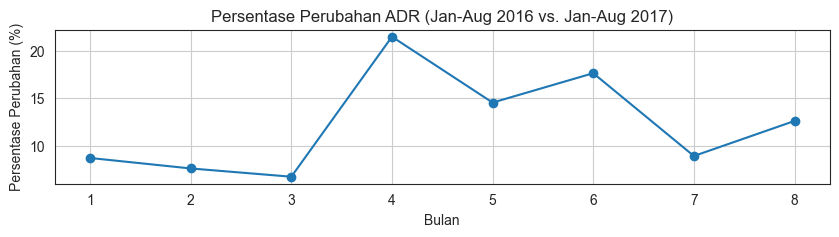

In [233]:
# Group by 'arrival_month' dan hitung total revenue
monthly_adr_2016 = df_2016.groupby('month')['adr'].median().reset_index(name='med_adr')
monthly_adr_2017 = df_2017.groupby('month')['adr'].median().reset_index(name='med_adr')

# Gabungkan data berdasarkan bulan
df_adr_combined = pd.merge(monthly_adr_2016, monthly_adr_2017, on='month', suffixes=('_2016', '_2017'))

# Hitung persentase perubahan
df_adr_combined['percentage_change'] = ((df_adr_combined['med_adr_2017'] - df_adr_combined['med_adr_2016']) / df_adr_combined['med_adr_2016']) * 100

# Plot perubahan persentase
plt.figure(figsize=(10, 2))
plt.plot(df_adr_combined['month'].astype(str), df_adr_combined['percentage_change'], marker='o')
plt.title('Persentase Perubahan ADR (Jan-Aug 2016 vs. Jan-Aug 2017)')
plt.xlabel('Bulan')
plt.ylabel('Persentase Perubahan (%)')
plt.grid(True)
plt.show()

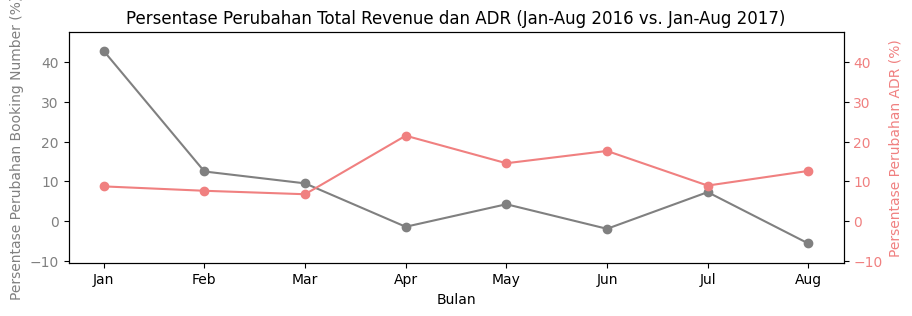

In [234]:
plt.style.use('default')

# Buat figure dan axis utama
fig, ax1 = plt.subplots(figsize=(10, 3))

# Plot pertama: Persentase Perubahan Booking Number (sumbu y kiri)
ax1.plot(df_combined['month'], df_combined['percentage_change'], marker='o', color='grey', label='Booking Number % Change')
ax1.set_xlabel('Bulan')
ax1.set_ylabel('Persentase Perubahan Booking Number (%)', color='grey')
ax1.tick_params(axis='y', labelcolor='grey')
ax1.set_xticks(ticks=range(1, 9))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])

# Buat sumbu y kedua
ax2 = ax1.twinx()

# Plot kedua: Persentase Perubahan ADR (sumbu y kanan)
ax2.plot(df_adr_combined['month'], df_adr_combined['percentage_change'], marker='o', color='lightcoral', label='ADR % Change')
ax2.set_ylabel('Persentase Perubahan ADR (%)', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')

# Temukan batas yang sama untuk kedua sumbu y dengan tambahan margin
ymin = min(df_combined['percentage_change'].min(), df_adr_combined['percentage_change'].min())
ymax = max(df_combined['percentage_change'].max(), df_adr_combined['percentage_change'].max())

# Tambahkan margin 10% untuk memberikan space
y_margin = 0.1 * (ymax - ymin)
ax1.set_ylim(ymin - y_margin, ymax + y_margin)
ax2.set_ylim(ymin - y_margin, ymax + y_margin)

# Tambahkan judul
plt.title('Persentase Perubahan Total Revenue dan ADR (Jan-Aug 2016 vs. Jan-Aug 2017)')

# Tampilkan plot
plt.show()

In [235]:
df_confirm[df_confirm['Clusters']==1].groupby('month').size()

month
1      504
2      855
3     1178
4     1142
5      962
6      832
7     1140
8     1389
9      912
10     926
11     683
12     690
dtype: int64

<Axes: xlabel='total_of_special_requests', ylabel='count'>

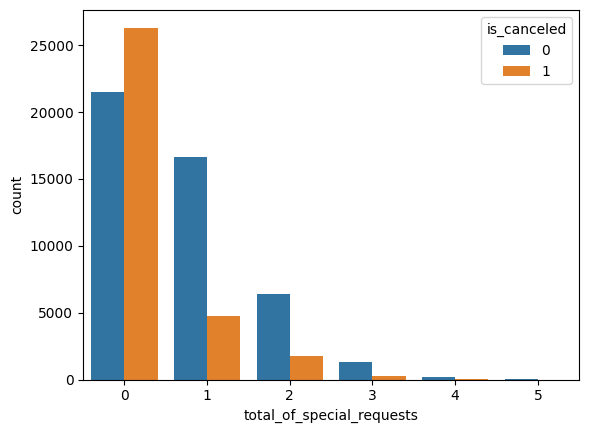

In [236]:
sns.countplot(data=df_clean, x='total_of_special_requests', hue='is_canceled')

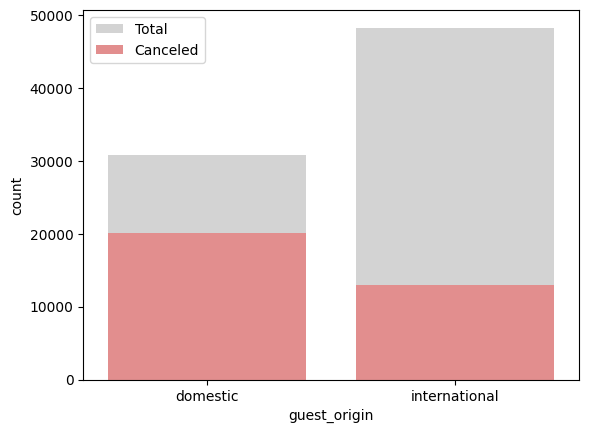

In [237]:
sns.countplot(data=df_clean, x='guest_origin', color='lightgrey', label='Total', dodge=False)

# Plot untuk data yang dibatalkan (is_canceled == 1)
sns.countplot(data=df_clean[df_clean['is_canceled'] == 1], x='guest_origin', color='lightcoral', label='Canceled', dodge=False)

# Tambahkan label
plt.legend()
plt.show()

In [238]:
df_clean['guest_origin'].value_counts()

guest_origin
international    48302
domestic         30861
Name: count, dtype: int64

In [250]:
# Hitung jumlah per kategori is_canceled untuk guest_origin 'domestic'
count = df_clean[df_clean['guest_origin'] == 'domestic'].groupby('is_canceled').size()

# Hitung persentase
percentage = (count / count.sum()) * 100

# Tampilkan hasil
print(percentage)

is_canceled
0    34.972943
1    65.027057
dtype: float64


In [240]:
df_clean[df_clean['guest_origin']=='domestic'].groupby(['distribution_channel', 'is_canceled']).size()

distribution_channel  is_canceled
Corporate             0               1643
                      1                729
Direct                0               1915
                      1                722
GDS                   0                 18
                      1                  3
TA/TO                 0               7217
                      1              18610
Undefined             1                  4
dtype: int64

In [241]:
df_cancel[(df_cancel['guest_origin']=='domestic') & (df_clean['distribution_channel']=='TA/TO')]['deposit_type'].value_counts()

deposit_type
Non Refund    12313
No Deposit     6294
Refundable        3
Name: count, dtype: int64

In [242]:
df_cancel[df_cancel['guest_origin']=='domestic']['market_segment'].value_counts()

market_segment
Groups           9494
Offline TA/TO    7003
Online TA        2301
Corporate         621
Direct            550
Complementary      56
Aviation           41
Undefined           2
Name: count, dtype: int64

In [243]:
df_clean['market_segment'].value_counts()

market_segment
Online TA        38679
Offline TA/TO    16712
Groups           13959
Direct            6072
Corporate         2977
Complementary      527
Aviation           235
Undefined            2
Name: count, dtype: int64

In [251]:
df_clean.groupby('total_of_special_requests')['adr'].mean()

total_of_special_requests
0     99.648966
1    111.314524
2    120.816169
3    123.193617
4    121.192071
5    119.631154
Name: adr, dtype: float64